In [35]:
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

In [36]:
import string

letters = dict(zip(list(range(0,26)),string.ascii_lowercase))

In [37]:
ASL_train = pd.read_csv('sign_mnist_train\sign_mnist_train.csv')
ASL_test = pd.read_csv('sign_mnist_test\sign_mnist_test.csv')

In [38]:
X_train = ASL_train.drop('label',axis=1)
y_train = ASL_train['label']
X_test = ASL_test.drop('label',axis=1)
y_test = ASL_test['label']

<AxesSubplot: ylabel='Count'>

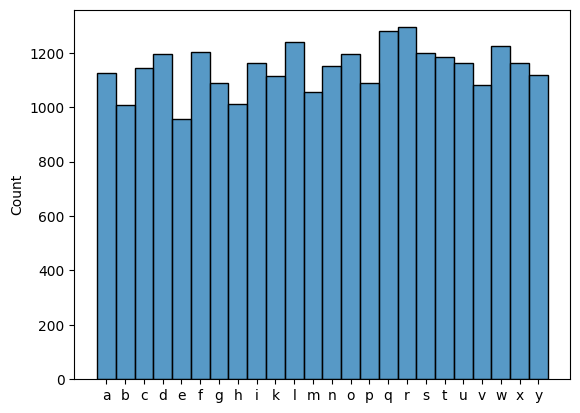

In [39]:
y_train_letters = np.array([letters[x] for x in y_train])
y_train_letters.sort()
# np.array(y_train_letters)
sns.histplot(data=y_train_letters)

In [40]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [41]:
X_train = X_train.reshape(27455,28,28)
X_test = X_test.reshape(7172,28,28)

In [42]:
X_train = X_train/255
X_test = X_test/255

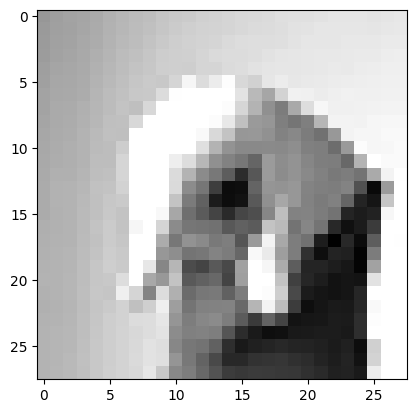

In [43]:
plt.imshow(X_train[5],cmap='gray')

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
# para=[{'max_iter':[100,200]}]

logmodel = LogisticRegression(max_iter=200)
# GS = GridSearchCV(estimator=LogisticRegression(), param_grid=para, refit=True, verbose=3)
# logmodel.fit(X_train,y_train)

In [46]:
log_preds = logmodel.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [47]:
keras.utils.to_categorical([0,1,2,3], num_classes=4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test,log_preds))

[[330   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0]
 [  0 393   0  18   0   0   0   0   0   0   0   0   0   0   0   0  20   0
    0   1   0   0   0   0]
 [  0   0 282   0   0  20   0   0   0   0   4   2   0   0   0   0   0   0
    0   0   2   0   0   0]
 [  0  14   0 153   1   0   0  18   0   0  11   0  18   0   0   0  21   0
    0   0   0   0   9   0]
 [  0   0   0   0 439   0   0   0   0   0   0   0  19   0   0   0   0  40
    0   0   0   0   0   0]
 [  0   0  20   0   0 223   3   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 263   0   0   0   0   9   0   3   0  29   0   1
   40   0   0   0   3   0]
 [  0   0   0   0   0   0  42 308   0   0   0  21   0   0   0   0   0   0
   37  21   0   0   7   0]
 [  0   0   0   0  12   0   0  22 152   6  21   0  14   0   0   0   3  18
    0   0   0   0   0  40]
 [  0   8   0   2   0  63   0   0   0 103   0   4   0   0  19   0  40  21
    0  41   0   2

In [49]:
model = Sequential()

model.add(Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1)))


model.add(Conv2D(32, (3,3), activation='relu'))

model.add(MaxPool2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))

model.add(MaxPool2D(2,2))





model.add(Flatten())
model.add(Dense(50,activation='relu'))
          
model.add(Dense(26,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train,y_train, epochs=6, batch_size=100, validation_data=(X_test,y_test))

Epoch 1/6
275/275 [==============================] - 20s 70ms/step - loss: 1.6296 - accuracy: 0.5116 - val_loss: 0.8353 - val_accuracy: 0.7352
Epoch 2/6
275/275 [==============================] - 18s 66ms/step - loss: 0.2978 - accuracy: 0.9099 - val_loss: 0.5301 - val_accuracy: 0.8455
Epoch 3/6
275/275 [==============================] - 19s 69ms/step - loss: 0.0629 - accuracy: 0.9878 - val_loss: 0.4232 - val_accuracy: 0.8963
Epoch 4/6
275/275 [==============================] - 19s 67ms/step - loss: 0.0133 - accuracy: 0.9996 - val_loss: 0.4630 - val_accuracy: 0.9066
Epoch 5/6
275/275 [==============================] - 19s 68ms/step - loss: 0.0047 - accuracy: 0.9999 - val_loss: 0.4885 - val_accuracy: 0.9004
Epoch 6/6
275/275 [==============================] - 20s 71ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.5251 - val_accuracy: 0.9063


In [50]:
model.evaluate(X_test,y_test)

225/225 [==============================] - 1s 5ms/step - loss: 0.5251 - accuracy: 0.9063


[0.5250513553619385, 0.906302273273468]

In [53]:
model.save('saved_models/model.hdf5')

In [55]:
from sklearn.metrics import accuracy_score
from keras.models import load_model

In [56]:
mod = load_model('saved_models/model.hdf5')

In [57]:
a = mod.predict(X_test)

225/225 [==============================] - 1s 5ms/step


In [59]:
preds = [np.argmax(a[x]) for x in range (0,len(a))]
result_letters = [np.argmax(a[x]) for x in range (0,len(a))]
result_letters = [letters[x] for x in result_letters]

accuracy_score(y_test,preds)
# print(letters[result_letters])
# print(f'Model: {[np.argmax(a[x]) for x in range (0,10)]}')
# print(f'''True values:
# {y_test[0:10]}''')

0.9063022866703848